In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('BostonHousing.csv')

In [3]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#data preprocessing
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
cols = ['crim', 'zn', 'tax']
# fitting the data
dcols = scalar.fit_transform(df[cols])
dcols = pd.DataFrame(dcols, columns=cols)
dcols.head()

,crim,zn,tax
0,-0.419782,0.284830,-0.666608
1,-0.417339,-0.487722,-0.987329
2,-0.417342,-0.487722,-0.987329
3,-0.416750,-0.487722,-1.106115
4,-0.412482,-0.487722,-1.106115


<Axes: >

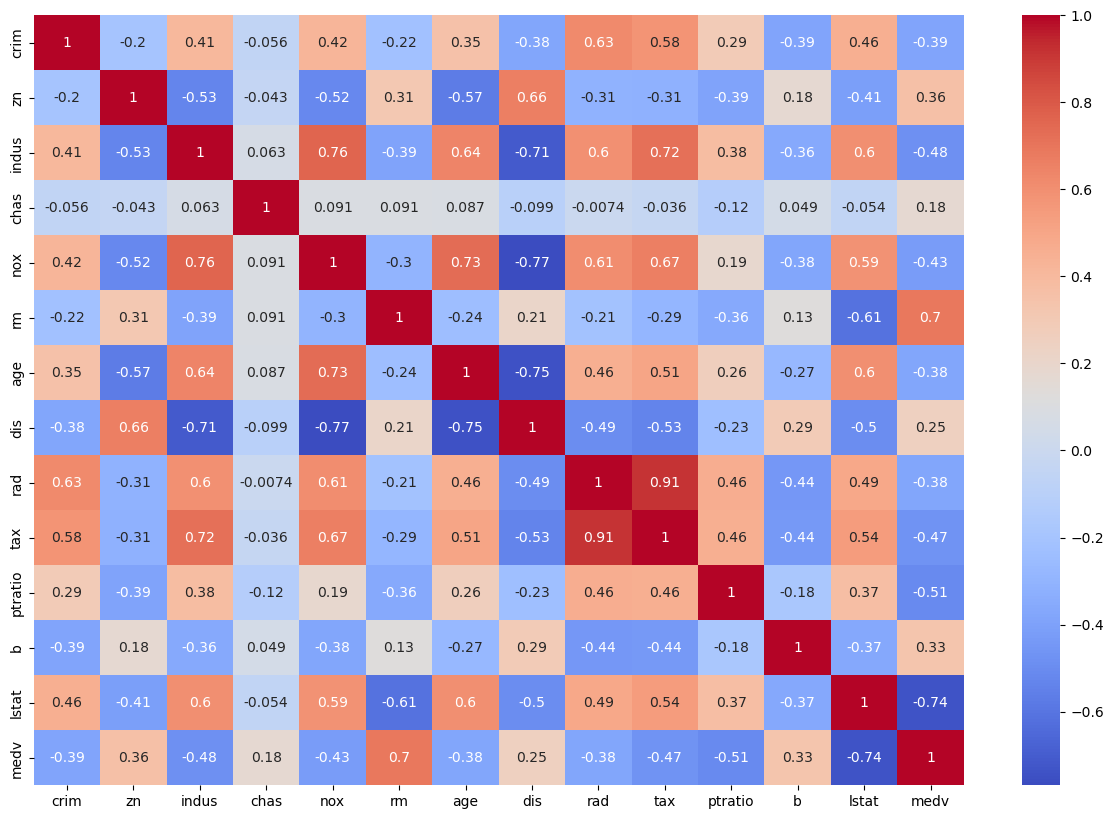

In [9]:
#finding corelation
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='rm', ylabel='medv'>

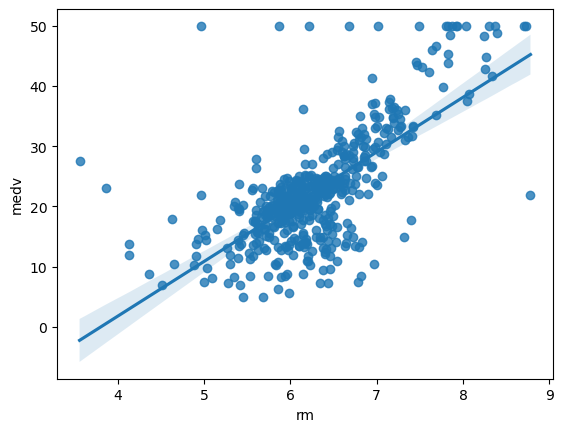

In [10]:
sns.regplot(y=df['medv'],x=df['rm'])

<Axes: xlabel='lstat', ylabel='medv'>

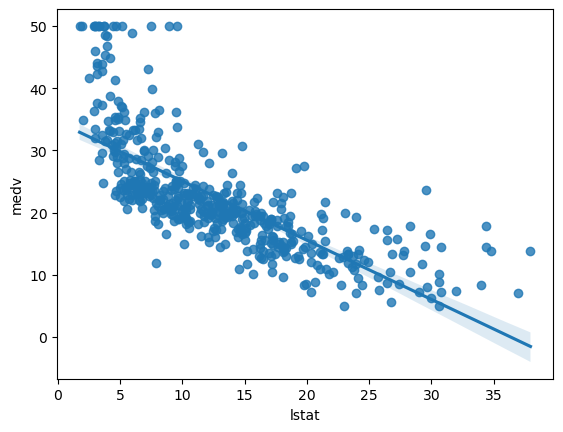

In [11]:
sns.regplot(y=df['medv'],x=df['lstat'])

In [12]:
#dropping the unnecessary columns
X=df.drop(columns=['medv','rad'],axis=1)
Y=df['medv']

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=7)
model.fit(x_train,y_train)

LinearRegression()

In [14]:
print(X.shape, x_train.shape, x_test.shape)

(506, 12) (354, 12) (152, 12)


In [15]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(152,)


In [16]:
from sklearn.metrics import r2_score
score=round(r2_score(y_test,y_pred))
print("r2_score= ",score)

r2_score=  1


In [17]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 3.37749533381879
Mean Squared Error: 3.37749533381879
Root Mean Squared Error: 3.37749533381879


In [18]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Variance':y_test-y_pred})
df1.head(5)

,Actual,Predicted,Variance
357,21.7,22.709935,-1.009935
337,18.5,18.389616,0.110384
327,22.2,19.822166,2.377834
13,20.4,19.616557,0.783443
418,8.8,8.804526,-0.004526


In [19]:
model.predict([[0.629,0.0,8.14,0,0.53,5.94,61.8,4.707,307,21.0,396.9,8.26]])

array([19.67343583])

In [20]:
model.intercept_

18.020423819994544

In [21]:
model.coef_

array([-4.99416473e-02,  2.23936873e-02, -4.29069105e-02,  3.08607087e+00,
       -1.33111773e+01,  5.59091680e+00, -1.53098603e-02, -1.34035689e+00,
       -8.80420443e-05, -8.58892338e-01,  1.09485409e-02, -3.81105678e-01])